In [136]:
import pandas as pd
import numpy as np
import yfinance as yf

In [137]:
import matplotlib.pyplot as plt

In [138]:
#df = pd.read_csv('NSE_TataGlobal.csv')
data = yf.download('TTM').reset_index()

[*********************100%***********************]  1 of 1 completed


In [139]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-09-27,9.150000,9.280000,9.050000,9.150000,7.971041,379700
1,2004-09-28,8.850000,8.850000,8.650000,8.760000,7.631292,332700
2,2004-09-29,8.760000,8.780000,8.660000,8.750000,7.622581,119800
3,2004-09-30,8.890000,8.970000,8.890000,8.970000,7.814236,166400
4,2004-10-01,9.140000,9.340000,9.120000,9.250000,8.058157,266600
...,...,...,...,...,...,...,...
4395,2022-03-11,27.620001,27.639999,26.120001,26.200001,26.200001,2301600
4396,2022-03-14,26.360001,26.700001,25.469999,25.770000,25.770000,2369000
4397,2022-03-15,26.469999,27.770000,26.469999,27.600000,27.600000,1279000
4398,2022-03-16,27.830000,28.459999,27.500000,28.459999,28.459999,996100


In [140]:
print(data.head())
print('\n Shape of the data:')
print(data.shape)

# setting the index as date
data.index = data['Date']

#df['date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
#df.index = df['date']
#df

#df = df.sort_values(by='Date')
#df

#df = df.sort_index()
#df

        Date  Open  High   Low  Close  Adj Close  Volume
0 2004-09-27  9.15  9.28  9.05   9.15   7.971041  379700
1 2004-09-28  8.85  8.85  8.65   8.76   7.631292  332700
2 2004-09-29  8.76  8.78  8.66   8.75   7.622581  119800
3 2004-09-30  8.89  8.97  8.89   8.97   7.814236  166400
4 2004-10-01  9.14  9.34  9.12   9.25   8.058157  266600

 Shape of the data:
(4400, 7)


In [141]:
#For Year
#year = df['Date']
#year

In [142]:
#df = df.head(5)

In [143]:
close_price = data['Close']
close_price

Date
2004-09-27     9.150000
2004-09-28     8.760000
2004-09-29     8.750000
2004-09-30     8.970000
2004-10-01     9.250000
                ...    
2022-03-11    26.200001
2022-03-14    25.770000
2022-03-15    27.600000
2022-03-16    28.459999
2022-03-17    28.070000
Name: Close, Length: 4400, dtype: float64

In [144]:
close_price.max()

51.470001220703125

In [145]:
split = int(len(data) * 0.8)
train = data[:split]
valid = data[split:]

print(split)
print(len(data))
print(len(valid['Date']))
#df_split = df.sample(frac=0.98, random_state=0)
#df_split = df_split.sort_values(by='Date')
#df_split

3520
4400
880


In [146]:
# close value from df
window_size = 50 # 2%
  
i = len(data)-50 # 98%
moving_averages = []
while i > len(train['Date']): #i < len(df['Close']) - window_size:
    window = data['Close'][i : i + window_size] #  e.g. 248 will not count # split 3519 : 3519 + 15
    window_average = round(sum(window) / window_size, 2)
    moving_averages.append(window_average)
    i = i - 1
    #print(moving_averages)    
print(moving_averages)
moving_averages.reverse()

[31.27, 31.36, 31.46, 31.55, 31.66, 31.76, 31.88, 31.98, 32.11, 32.24, 32.32, 32.35, 32.36, 32.41, 32.45, 32.47, 32.52, 32.56, 32.57, 32.57, 32.54, 32.5, 32.46, 32.48, 32.46, 32.41, 32.35, 32.29, 32.29, 32.29, 32.27, 32.27, 32.26, 32.29, 32.32, 32.34, 32.38, 32.41, 32.45, 32.47, 32.47, 32.44, 32.41, 32.38, 32.34, 32.32, 32.27, 32.24, 32.23, 32.23, 32.24, 32.24, 32.24, 32.25, 32.26, 32.31, 32.36, 32.4, 32.46, 32.46, 32.42, 32.35, 32.26, 32.08, 31.9, 31.72, 31.53, 31.33, 31.13, 30.92, 30.74, 30.56, 30.37, 30.16, 29.94, 29.73, 29.52, 29.33, 29.1, 28.85, 28.62, 28.35, 28.09, 27.79, 27.49, 27.23, 26.95, 26.69, 26.41, 26.13, 25.85, 25.57, 25.3, 25.03, 24.77, 24.48, 24.23, 23.98, 23.72, 23.46, 23.23, 22.99, 22.72, 22.47, 22.23, 21.95, 21.67, 21.39, 21.11, 20.88, 20.71, 20.58, 20.45, 20.39, 20.32, 20.26, 20.2, 20.16, 20.12, 20.09, 20.04, 20.01, 19.98, 19.96, 19.96, 19.97, 19.96, 19.95, 19.93, 19.98, 20.03, 20.08, 20.13, 20.19, 20.25, 20.3, 20.35, 20.4, 20.46, 20.51, 20.57, 20.66, 20.76, 20.85,

In [147]:
#print(moving_averages)

In [148]:
print(len(moving_averages))

830


In [150]:
#print(len(valid['Date']))
#print(len(valid['Close']))

#print(len(train['Date']))
#print(len(train['Close']))

In [151]:
# Just checking the RMSE does not help us to understand how the model work. 

/tmp/ipykernel_31304/3277758784.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_mv['Predictions'] = 0
/tmp/ipykernel_31304/3277758784.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_mv['Predictions'] = moving_averages


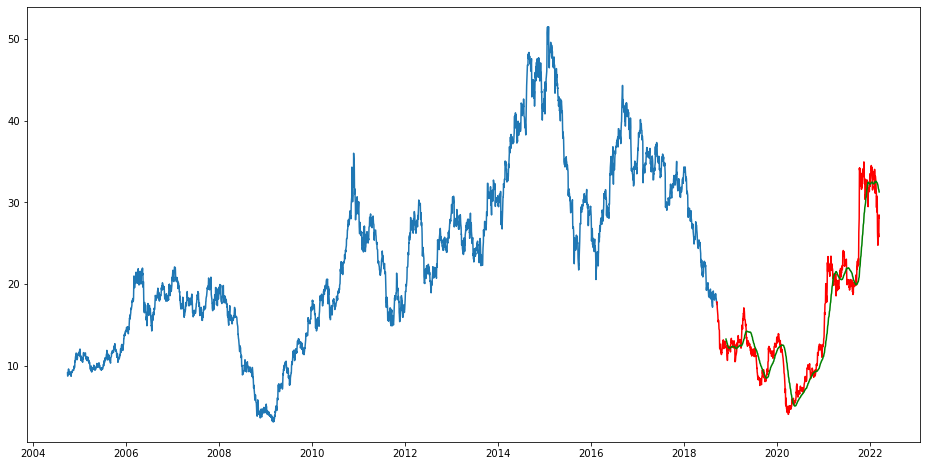

In [152]:
plt.figure(figsize=(16,8))
plt.plot(train['Date'], train['Close'])
plt.plot(valid['Date'], valid['Close'], color='red')

#split_mv = len(valid['Date'])-10
#train_mv = data[:split]
valid_mv = data[split+50:]

#print(len(valid_mv))
valid_mv['Predictions'] = 0
valid_mv['Predictions'] = moving_averages

plt.plot(valid_mv['Date'], valid_mv['Predictions'], color='green')

plt.show()